In [ ]:
import numpy as np
import pandas as pd
import glob
from skimage.io import imread
from skimage import io
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
directory = "/content/drive/MyDrive/00 CSE428 Lab Project/"
os.chdir(directory)
!ls

 428-Project.ipynb   model.png	    part2.ipynb
 Group_3	     part-1.ipynb  'Screenshot 2023-12-06 213102.png'


In [ ]:
"""def convert_to_csv(path_to_dataset):
    image_paths = glob.glob(path_to_dataset + '\\*\\*\\*\\*.JPEG')

    train_imgs = []
    test_imgs = []

    for image_path in image_paths:
        image = imread(image_path)
        if image.shape[-1] != 3:
            image = gray2rgb(image)
        if image_path.split('\\')[-3] == 'train':
            train_imgs.append(image.ravel().tolist() + [image_path.split('\\')[-2]])

        else:
            test_imgs.append(image.ravel().tolist() + [image_path.split('\\')[-2]])

    img_0 = imread(image_paths[0])
    column_names = [f"p_{x}" for x in range(np.prod(img_0.shape))] + ['label']

    train_df = pd.DataFrame(train_imgs, columns=column_names)
    test_df = pd.DataFrame(test_imgs, columns=column_names)

    train_df.to_csv(path_to_dataset+'/train.csv', index=False)
    test_df.to_csv(path_to_dataset+'/test.csv', index=False)

convert_to_csv('Group_3')"""

'def convert_to_csv(path_to_dataset):\n    image_paths = glob.glob(path_to_dataset + \'\\*\\*\\*\\*.JPEG\')\n\n    train_imgs = []\n    test_imgs = []\n\n    for image_path in image_paths:\n        image = imread(image_path)\n        if image.shape[-1] != 3:\n            image = gray2rgb(image)\n        if image_path.split(\'\\\')[-3] == \'train\':\n            train_imgs.append(image.ravel().tolist() + [image_path.split(\'\\\')[-2]])\n\n        else:\n            test_imgs.append(image.ravel().tolist() + [image_path.split(\'\\\')[-2]])\n\n    img_0 = imread(image_paths[0])\n    column_names = [f"p_{x}" for x in range(np.prod(img_0.shape))] + [\'label\']\n\n    train_df = pd.DataFrame(train_imgs, columns=column_names)\n    test_df = pd.DataFrame(test_imgs, columns=column_names)\n\n    train_df.to_csv(path_to_dataset+\'/train.csv\', index=False)\n    test_df.to_csv(path_to_dataset+\'/test.csv\', index=False)\n\nconvert_to_csv(\'Group_3\')'

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Masudaitese_Dataset/Dataset_1_3GB/GroundTruth.csv')

In [ ]:
df_train.shape

(10015, 8)

In [ ]:
df_train

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
unique_labels = df_train["label"].unique()
print(unique_labels)
print(len(unique_labels))

KeyError: 'label'

In [ ]:
print(df_train.label.value_counts())

AttributeError: 'DataFrame' object has no attribute 'label'

In [ ]:
df_test = pd.read_csv('Group_3/test.csv')

In [ ]:
df_test.shape

(250, 12289)

In [ ]:
df_test

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,237,238,242,237,238,242,237,238,242,238,...,217,234,244,217,235,247,217,235,247,flagpole
1,82,130,179,83,130,176,87,128,172,90,...,89,130,174,89,130,174,89,130,174,flagpole
2,30,31,0,37,40,9,14,17,0,31,...,72,72,70,94,94,94,86,86,86,flagpole
3,175,173,178,188,186,191,208,206,211,212,...,53,77,19,57,81,23,61,86,28,flagpole
4,6,12,34,0,0,30,215,220,242,0,...,138,105,114,115,108,102,97,108,94,flagpole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,28,0,8,29,2,11,32,5,12,29,...,21,10,6,17,8,3,14,5,0,lampshade
246,2,2,2,2,2,2,2,2,2,2,...,4,4,4,4,4,4,4,4,4,lampshade
247,117,117,107,116,116,106,116,116,106,119,...,45,26,9,56,35,18,45,24,7,lampshade
248,240,132,21,236,128,17,233,126,12,236,...,144,48,6,140,51,7,138,54,8,lampshade


In [ ]:
print(df_test.label.value_counts())

flagpole     50
gasmask      50
gondola      50
hourglass    50
lampshade    50
Name: label, dtype: int64


<Axes: title={'center': 'Count (label)'}>

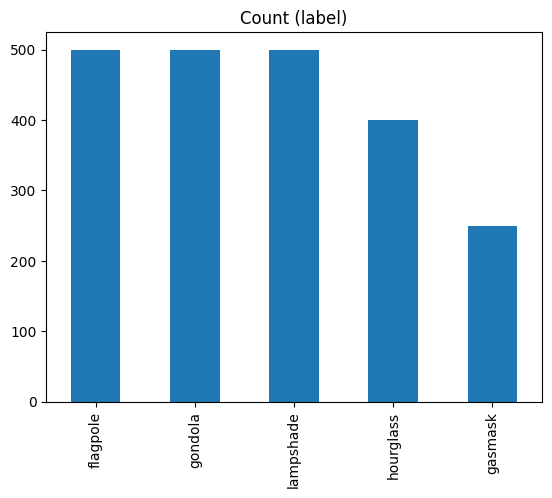

In [ ]:
df_train.label.value_counts().plot(kind='bar', title='Count (label)')

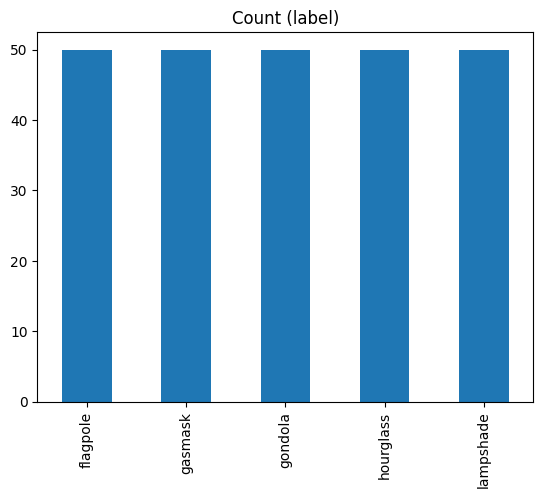

In [ ]:
df_test.label.value_counts().plot(kind='bar', title='Count (label)');

In [ ]:
df_train['label']

0        flagpole
1        flagpole
2        flagpole
3        flagpole
4        flagpole
          ...    
2145    lampshade
2146    lampshade
2147    lampshade
2148    lampshade
2149    lampshade
Name: label, Length: 2150, dtype: object

In [ ]:
X_train = df_train.drop(['label'], axis=1)
y_train = df_train["label"]

In [ ]:
X_test= df_test.drop(['label'], axis=1)
y_test= df_test["label"]

In [ ]:
#scaling train

X_train_norm = preprocessing.minmax_scale(X_train)
df_train = pd.DataFrame(X_train_norm, columns=df_train.columns[:-1])
df_train.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,0.635294,0.666667,0.717647,0.639216,0.670588,0.721569,0.643137,0.674510,0.717647,0.654902,...,0.066667,0.141176,0.145098,0.121569,0.160784,0.164706,0.141176,0.086275,0.090196,0.066667
1,0.262745,0.564706,0.839216,0.262745,0.564706,0.847059,0.266667,0.568627,0.850980,0.274510,...,0.368627,0.560784,0.494118,0.376471,0.572549,0.498039,0.372549,0.560784,0.486275,0.356863
2,0.949020,0.929412,0.952941,0.952941,0.925490,0.952941,0.952941,0.929412,0.945098,0.956863,...,0.905882,0.894118,0.894118,0.901961,0.894118,0.894118,0.901961,0.894118,0.894118,0.901961
3,0.541176,0.725490,0.890196,0.537255,0.721569,0.886275,0.533333,0.705882,0.882353,0.517647,...,0.556863,0.458824,0.541176,0.545098,0.466667,0.549020,0.552941,0.486275,0.568627,0.572549
4,0.239216,0.419608,0.611765,0.239216,0.419608,0.611765,0.243137,0.423529,0.615686,0.243137,...,0.800000,0.643137,0.764706,0.835294,0.670588,0.796078,0.854902,0.635294,0.760784,0.819608


In [ ]:
#scaling test

X_test_norm = preprocessing.minmax_scale(X_test)
df_test = pd.DataFrame(X_test_norm, columns=df_test.columns[:-1])
df_test.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,0.929412,0.933333,0.949020,0.929412,0.933333,0.949020,0.929412,0.933333,0.949020,0.933333,...,0.949020,0.850980,0.917647,0.956863,0.850980,0.921569,0.968627,0.850980,0.921569,0.968627
1,0.321569,0.509804,0.701961,0.325490,0.509804,0.690196,0.341176,0.501961,0.674510,0.352941,...,0.682353,0.349020,0.509804,0.682353,0.349020,0.509804,0.682353,0.349020,0.509804,0.682353
2,0.117647,0.121569,0.000000,0.145098,0.156863,0.035294,0.054902,0.066667,0.000000,0.121569,...,0.333333,0.282353,0.282353,0.274510,0.368627,0.368627,0.368627,0.337255,0.337255,0.337255
3,0.686275,0.678431,0.698039,0.737255,0.729412,0.749020,0.815686,0.807843,0.827451,0.831373,...,0.082353,0.207843,0.301961,0.074510,0.223529,0.317647,0.090196,0.239216,0.337255,0.109804
4,0.023529,0.047059,0.133333,0.000000,0.000000,0.117647,0.843137,0.862745,0.949020,0.000000,...,0.486275,0.541176,0.411765,0.447059,0.450980,0.423529,0.400000,0.380392,0.423529,0.368627


 **Logistic Regression**



In [ ]:
model = linear_model.LogisticRegression(solver='lbfgs', max_iter=17)
model = model.fit(X_train_norm, y_train)

y_train_predict = model.predict(X_train_norm)

y_test_predict = model.predict(X_test_norm)

acc_training = np.mean(y_train == y_train_predict) * 100
acc_testing = np.mean(y_test == y_test_predict) * 100
print("Training accuracy (%) =", format(acc_training, ".2f"))
print("Testing accuracy (%) =", format(acc_testing, ".2f"))

Training accuracy (%) = 59.63
Testing accuracy (%) = 52.00


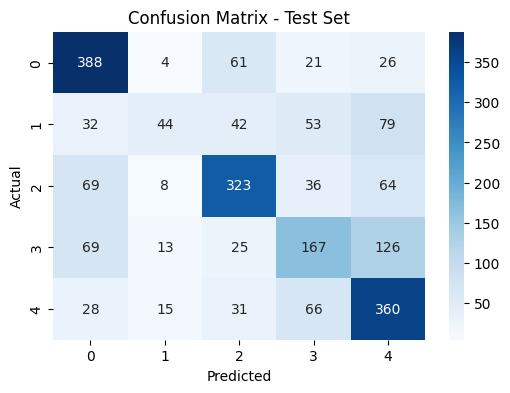

In [ ]:
cm_train = confusion_matrix(y_train, y_train_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

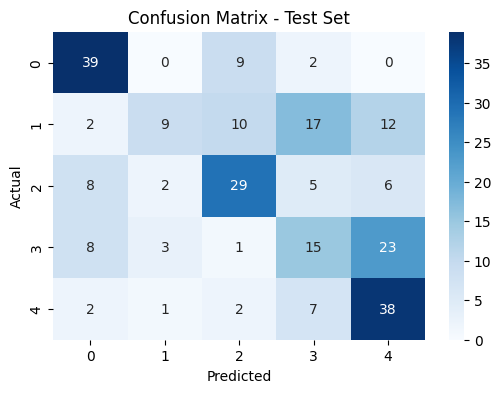

In [ ]:

cm_test = confusion_matrix(y_test, y_test_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
def calc(cnf_matrix):
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    F1 = 2*((PPV)*(TPR)/(PPV + TPR))

    return TPR, TNR, PPV, NPV, F1

TPR, TNR, PPV, NPV, F1 = calc(cm_train)
print(TPR, TNR, PPV, NPV, F1)

[0.776  0.176  0.646  0.4175 0.72  ] [0.88       0.97894737 0.90363636 0.89942857 0.82121212] [0.66211604 0.52380952 0.67012448 0.48688047 0.54961832] [0.92838875 0.90029042 0.89388489 0.871057   0.90635452] [0.7145488  0.26347305 0.65784114 0.44952894 0.62337662]


In [ ]:
from tabulate import tabulate
data2 = [0,0,0,0,0]
print("Training accuracy (%) =", format(acc_training, ".2f"))
print("Classification Report of Train Set:")
table_data = [
    ["Sensitivity", "Specificity", "PPV", "NPV", "F1 Score"],
]

for i in range(len(TPR)):
    table_data.append([round(TPR[i], 2), round(TNR[i], 2), round(PPV[i], 2), round(NPV[i], 2), round(F1[i], 2)])
    data2[0]+= TPR[i]
    data2[1]+= TNR[i]
    data2[2]+= PPV[i]
    data2[3]+= NPV[i]
    data2[4]+= F1[i]

print(tabulate(table_data, headers="firstrow", tablefmt="pretty",showindex=True))
print(f"Sensitivity-{round(data2[0]/5,2)} Specificity-{round(data2[1]/5,2)} PPV-{round(data2[2]/5,2)} NPV-{round(data2[3]/5,2)}/4 F1 Score-{round(data2[4]/5,2)}")

Training accuracy (%) = 59.63
Classification Report of Train Set:
+---+-------------+-------------+------+------+----------+
|   | Sensitivity | Specificity | PPV  | NPV  | F1 Score |
+---+-------------+-------------+------+------+----------+
| 0 |    0.78     |    0.88     | 0.66 | 0.93 |   0.71   |
| 1 |    0.18     |    0.98     | 0.52 | 0.9  |   0.26   |
| 2 |    0.65     |     0.9     | 0.67 | 0.89 |   0.66   |
| 3 |    0.42     |     0.9     | 0.49 | 0.87 |   0.45   |
| 4 |    0.72     |    0.82     | 0.55 | 0.91 |   0.62   |
+---+-------------+-------------+------+------+----------+
Sensitivity-0.55 Specificity-0.9 PPV-0.58 NPV-0.9/4 F1 Score-0.54


In [ ]:
TPR, TNR, PPV, NPV, F1 = calc(cm_test)
print(TPR, TNR, PPV, NPV, F1)

[0.78 0.18 0.58 0.3  0.76] [0.9   0.97  0.89  0.845 0.795] [0.66101695 0.6        0.56862745 0.32608696 0.48101266] [0.94240838 0.82553191 0.89447236 0.82843137 0.92982456] [0.71559633 0.27692308 0.57425743 0.3125     0.58914729]


In [ ]:
from tabulate import tabulate
data2 = [0,0,0,0,0]
print("Testing accuracy (%) =", format(acc_testing, ".2f"))
print("Classification Report of Train Set:")
table_data = [
    ["Sensitivity", "Specificity", "PPV", "NPV", "F1 Score"],
]

for i in range(len(TPR)):
    table_data.append([round(TPR[i], 2), round(TNR[i], 2), round(PPV[i], 2), round(NPV[i], 2), round(F1[i], 2)])
    data2[0]+= TPR[i]
    data2[1]+= TNR[i]
    data2[2]+= PPV[i]
    data2[3]+= NPV[i]
    data2[4]+= F1[i]

print(tabulate(table_data, headers="firstrow", tablefmt="pretty",showindex=True))
print(f"Sensitivity-{round(data2[0]/5,2)} Specificity-{round(data2[1]/5,2)} PPV-{round(data2[2]/5,2)} NPV-{round(data2[3]/5,2)}/4 F1 Score-{round(data2[4]/5,2)}")

Testing accuracy (%) = 52.00
Classification Report of Train Set:
+---+-------------+-------------+------+------+----------+
|   | Sensitivity | Specificity | PPV  | NPV  | F1 Score |
+---+-------------+-------------+------+------+----------+
| 0 |    0.78     |     0.9     | 0.66 | 0.94 |   0.72   |
| 1 |    0.18     |    0.97     | 0.6  | 0.83 |   0.28   |
| 2 |    0.58     |    0.89     | 0.57 | 0.89 |   0.57   |
| 3 |     0.3     |    0.84     | 0.33 | 0.83 |   0.31   |
| 4 |    0.76     |     0.8     | 0.48 | 0.93 |   0.59   |
+---+-------------+-------------+------+------+----------+
Sensitivity-0.52 Specificity-0.88 PPV-0.53 NPV-0.88/4 F1 Score-0.49


**Neural Network**

In [ ]:
# Flatten the inputs
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], -1)

In [ ]:

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
number_of_classes = 5
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

In [ ]:
model = Sequential()
model.add( Input(shape = (12288,)) )
model.add( Dense(128, activation='sigmoid') ) #hidden layer
model.add( Dense(64, activation='sigmoid') ) #hidden layer
model.add( Dense(32, activation='sigmoid') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [ ]:
# Compile the model
model.compile(optimizer='sgd', # 'adam'
              loss='categorical_crossentropy',
              metrics=['accuracy'])

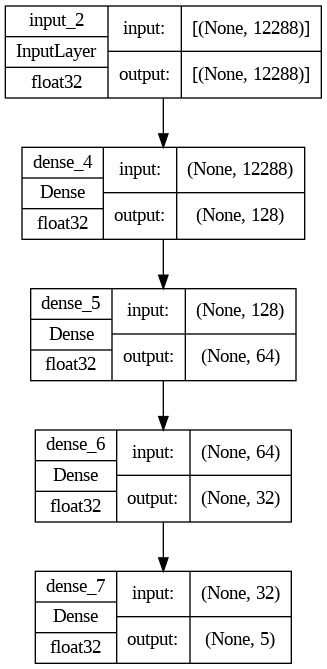

In [ ]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [ ]:
model.fit(X_train_norm, y_train, epochs=70, verbose=1)

Epoch 1/70
68/68 [==============================] - 1s 11ms/step - loss: 1.6025 - accuracy: 0.2326
Epoch 2/70
68/68 [==============================] - 1s 11ms/step - loss: 1.5752 - accuracy: 0.2856
Epoch 3/70
68/68 [==============================] - 1s 16ms/step - loss: 1.5716 - accuracy: 0.3274
Epoch 4/70
68/68 [==============================] - 1s 17ms/step - loss: 1.5698 - accuracy: 0.3474
Epoch 5/70
68/68 [==============================] - 1s 18ms/step - loss: 1.5675 - accuracy: 0.3874
Epoch 6/70
68/68 [==============================] - 1s 17ms/step - loss: 1.5649 - accuracy: 0.3786
Epoch 7/70
68/68 [==============================] - 1s 17ms/step - loss: 1.5620 - accuracy: 0.3791
Epoch 8/70
68/68 [==============================] - 1s 16ms/step - loss: 1.5593 - accuracy: 0.4112
Epoch 9/70
68/68 [==============================] - 1s 16ms/step - loss: 1.5565 - accuracy: 0.4070
Epoch 10/70
68/68 [==============================] - 1s 11ms/step - loss: 1.5537 - accuracy: 0.4488
Epoch 11/

In [ ]:
y_pred = model.predict(X_test_norm)

8/8 [==============================] - 0s 5ms/step


In [ ]:
y_predicted = np.argmax(y_pred, axis=1)

In [ ]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
y_pred = model.predict(X_test_norm)

8/8 [==============================] - 0s 5ms/step


In [ ]:
y_predicted = np.argmax(y_pred, axis=1)

In [ ]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
nn_testing = np.mean(y_actual == y_predicted)*100
print("Testing accuracy (%) =", nn_testing)

Testing accuracy (%) = 44.4


In [ ]:
# loss_test, pred_test = model.evaluate(X_test_norm, y_test)
test_loss, test_acc = model.evaluate(X_test_norm, y_test)
print("Testing accuracy (%) =", test_acc)

8/8 [==============================] - 0s 5ms/step - loss: 1.2254 - accuracy: 0.4440
Testing accuracy (%) = 0.4440000057220459


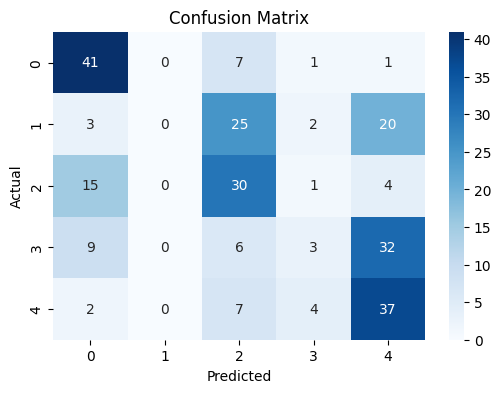

In [ ]:
cm = confusion_matrix(y_actual,y_predicted)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
def calc(cnf_matrix):
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    F1 = 2*((PPV)*(TPR)/(PPV + TPR))

    return TPR, TNR, PPV, NPV, F1

TPR, TNR, PPV, NPV, F1 = calc(cm)
print(TPR, TNR, PPV, NPV, F1)

[0.82 0.   0.6  0.06 0.74] [0.855 1.    0.775 0.96  0.715] [0.58571429        nan 0.4        0.27272727 0.39361702] [0.95       0.8        0.88571429 0.80334728 0.91666667] [0.68333333        nan 0.48       0.09836066 0.51388889]


In [ ]:
from tabulate import tabulate

print("Testing accuracy (%) =", format(nn_testing, ".2f"))
data1 = [0,0,0,0,0]
print("Classification Report:")
table_data = [
    ["Sensitivity", "Specificity", "PPV", "NPV", "F1 Score"],
]

for i in range(len(TPR)):
    table_data.append([round(TPR[i], 2), round(TNR[i], 2), round(PPV[i], 2), round(NPV[i], 2), round(F1[i], 2)])
    data1[0]+= TPR[i]
    data1[1]+= TNR[i]
    data1[2]+= PPV[i]
    data1[3]+= NPV[i]
    data1[4]+= F1[i]
print(tabulate(table_data, headers="firstrow", tablefmt="pretty",showindex=True))

print(f"Sensitivity-{round(data1[0]/5,2)} Specificity-{round(data1[1]/5,2)} PPV-{round(data1[2]/5,2)} NPV-{round(data1[3]/5,2)}/4 F1 Score-{round(data1[4]/5,2)}")

Testing accuracy (%) = 44.40
Classification Report:
+---+-------------+-------------+------+------+----------+
|   | Sensitivity | Specificity | PPV  | NPV  | F1 Score |
+---+-------------+-------------+------+------+----------+
| 0 |    0.82     |    0.86     | 0.59 | 0.95 |   0.68   |
| 1 |     0.0     |     1.0     | nan  | 0.8  |   nan    |
| 2 |     0.6     |    0.78     | 0.4  | 0.89 |   0.48   |
| 3 |    0.06     |    0.96     | 0.27 | 0.8  |   0.1    |
| 4 |    0.74     |    0.72     | 0.39 | 0.92 |   0.51   |
+---+-------------+-------------+------+------+----------+
Sensitivity-0.44 Specificity-0.86 PPV-nan NPV-0.87/4 F1 Score-nan


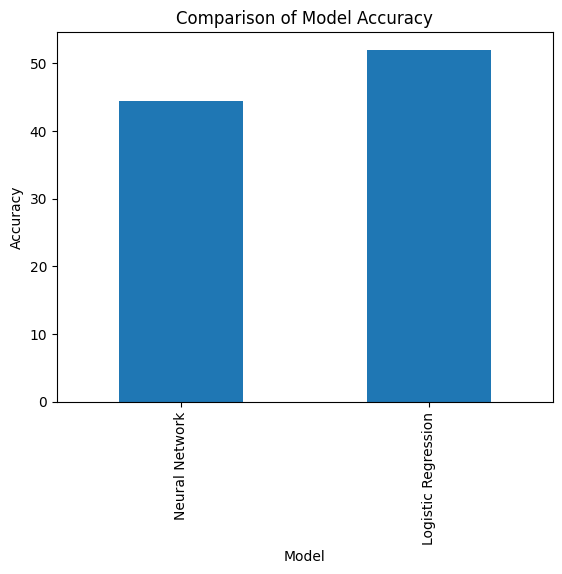

In [ ]:
# Creating a pandas DataFrame for results
results = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression'],
    'Accuracy': [nn_testing, acc_testing]
})

# Plotting the bar plot
results.plot(x='Model', y='Accuracy', kind='bar', legend=False)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.show()

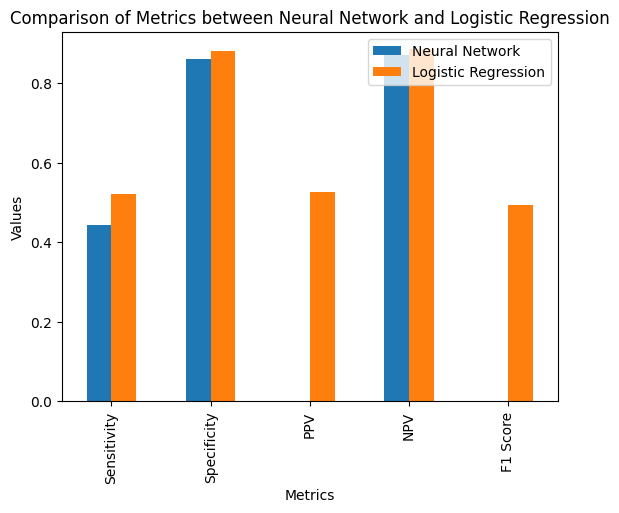

In [ ]:
metrics = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score']

# Creating a pandas DataFrame for comparison
comparison_df = pd.DataFrame({
    'Metrics': metrics,
    'Neural Network': np.array(data1)/5,
    'Logistic Regression': np.array(data2)/5
})

# Plotting the comparison using a bar plot
comparison_df.plot(x='Metrics', kind='bar')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics between Neural Network and Logistic Regression')
plt.legend(loc='best')
plt.show()